# Introduction


Living beings - humans and animals alike, have a need for systems of communication to ensure their survival. Humans, by their ingenuity, have developed writing systems as a conventional visual mode to represent their oral communication. While writing and talking are both tools for transmitting messages, writing has the advantage of being a reliable form of data storage that obeys the usual coding and decoding rules, which imply a shared understanding by the author and the reader of the sets of characters composing the used writing system. Latin Alphabets, which is the writing system of interest in this Project, is the script adopted by the people all over the world. In this Project we are going to do the classification of the lati alphabets using the one of the latest tools in the Three-dimensional analysis i.e., Persistent homology. The main advantage of the TDA is it provides more robust prediction with a small simple set of data. By computing the bottleneck, mean distances, we can check how robust our algorithm is and how well it’s classifying the Latin Alphabets .

Background:
Homology formalizes the way topological spaces are distinguished by examining their holes. One of the most common approaches to homology is persistent homology.

Persistent homology:
Persistent homology, one of the main tools in topological data analysis, proved its usefulness in many real-world applications among which shape analysis, medical imaging and network sensing are only a few examples. In many of these applications, data is given as a point cloud. Persistent homology keeps track of homology classes as a nested sequence of simplicial complexes is built on top of the data. The “lifetime” of a homology class is an indication of the relevance or irrelevance of homological information.



Persistent Barcode:
We can encode the evolution of homology class in a persistence barcode, which is a set of intervals whose first endpoint indicates the birth-time of the homology class, while the second one indicates its death-time. Short line segments correspond to noise, while persistent line segments imply relevant homological information. This is called the persistence diagram. Barcodes can be computed efficiently by using a matrix reduction algorithm. Surprisingly, we can get all this information with a single reduction. 






# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from persim import plot_diagrams
from ripser import ripser, lower_star_img
import numpy as np
from numpy import genfromtxt
from scipy.spatial import distance_matrix
import copy
from PIL import Image
import itertools
import string
import glob
from IPython import display

alphabet_full gives a list of all Latin Alphabet letters and extra characters we used to create persistent homologies. 

In [ ]:
alphabet = list(string.ascii_lowercase)
extra = ['.', ',','space', '-', ':', ';']
alphabet_full = alphabet + extra

Read in our hand calculated number representation of the drawing using 1s and 0s, and represented as one row.As a is defined as

 [0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

In [ ]:
df = pd.read_csv('letters.csv', header=None, index_col=0)
df_inv = df[df.columns[::-1]]
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[df.columns[::-1]]

,100,99,98,97,96,95,94,93,92,91,...,10,9,8,7,6,5,4,3,2,1
0,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scanning Techniques

Scanning Techniques are representations of letters in different ways. For example reading a letter from left to right or from up to down. Function takes in a list of tuples where the first element is the index(row number) and the second element is the row in a series form. Size indicates that the square indication of the image so 10 is a 10x10 image. top_techniques goes through each row applies the techniques puts them in a dataframe and appends them to a dictionary for each Latin alphabet character. Here, we have used nine scanning and probing techniques as listed below:

- Scanning left to right

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      columnnumber & x=1
   \end{cases}
$



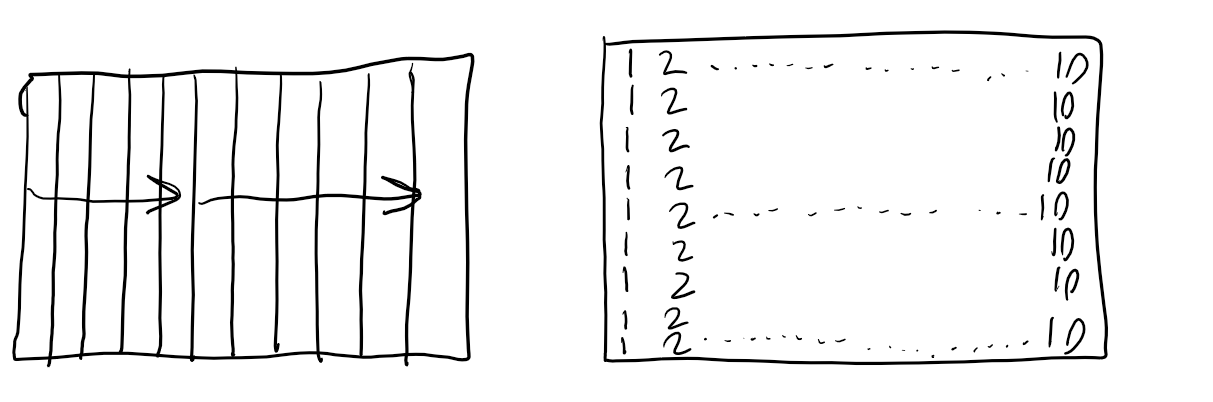

In [ ]:
display.Image("/work/Technique Drawings/Scanning Left to Right.png")

- Scanning Right to Left

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      11-columnnumber & x=1
   \end{cases}
$

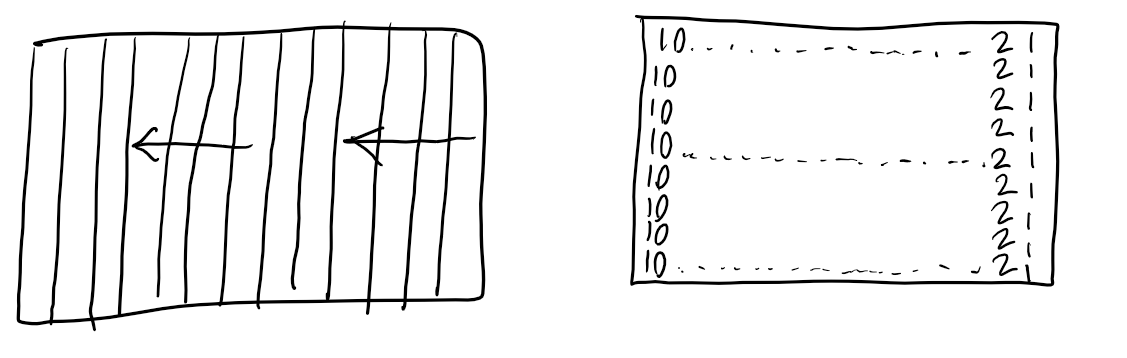

In [ ]:
display.Image("/work/Technique Drawings/Scanning Right to Left.png")

- Scanning Up to down

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      row number & x=1
   \end{cases}
$

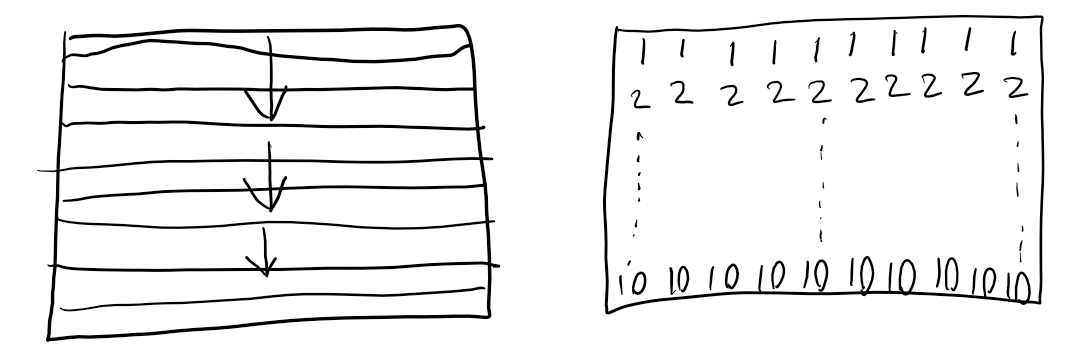

In [ ]:
display.Image("/work/Technique Drawings/Scanning Up to Down.png")

- Scanning Down to Up

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      11-rownumber & x=1
   \end{cases}
$

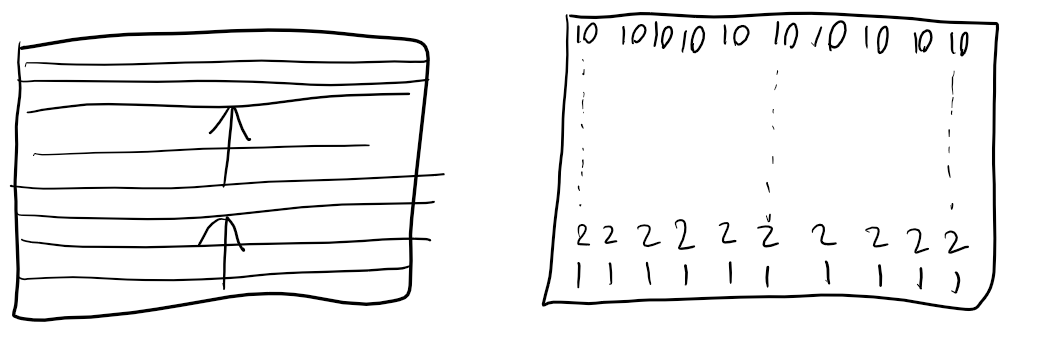

In [ ]:
display.Image("/work/Technique Drawings/Scanning Down to Up.png")

- Diagonal scanning from upper left

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      rownumber+columnnumber & x=1
   \end{cases}
$

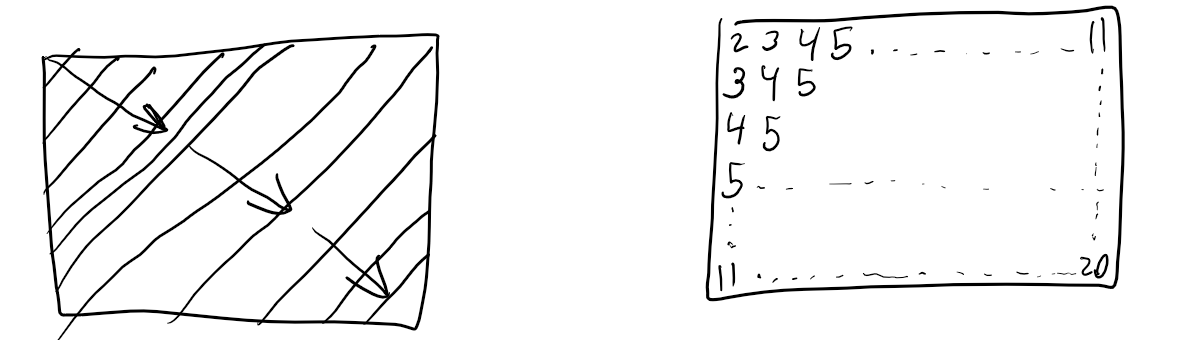

In [ ]:
display.Image("/work/Technique Drawings/Diagonal Scanning Upper Left.png")

- Diagonal scanning from lower left

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      (11-rownumber)+(11-columnnumber) & x=1
   \end{cases}
$

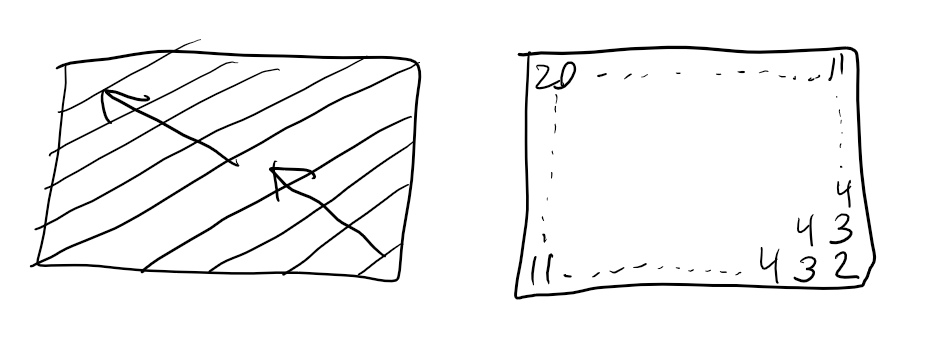

In [ ]:
display.Image("/work/Technique Drawings/Diagonal Scanning Lower Right.png")

- Probing from upper left

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      max(rownumber, columnnumber) & x=1
   \end{cases}
$

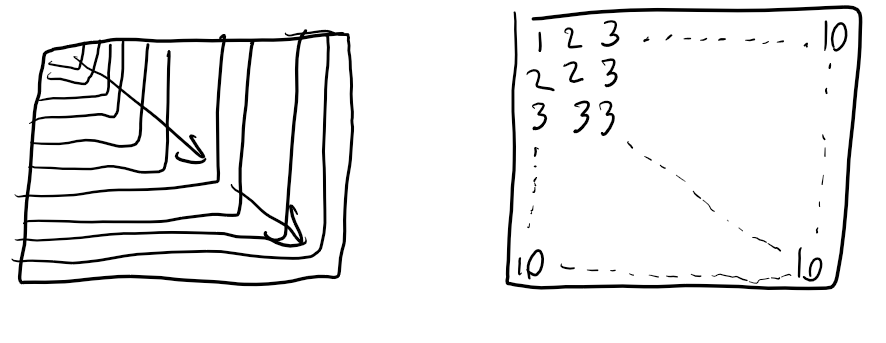

In [ ]:
display.Image("/work/Technique Drawings/Probbing Upper Left.png")

- Probing from lower right

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      max(11-rownumber, 11-columnnumber) & x=1
   \end{cases}
$

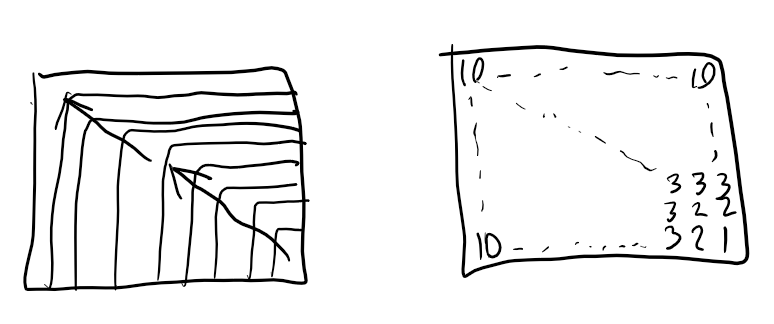

In [ ]:
display.Image("/work/Technique Drawings/Probing Lower Right.png")

- Probing all four directions from the center

$ 
point(x, row number, columnnumber) = \begin{cases} 
      100 & x = 0 \\
      max(max(rownumber-(10/2), columnnumber-(10/2)), \\
      max(11-rownumber-(10/2), 11-columnnumber-(10/2))) & x=1
   \end{cases}
$

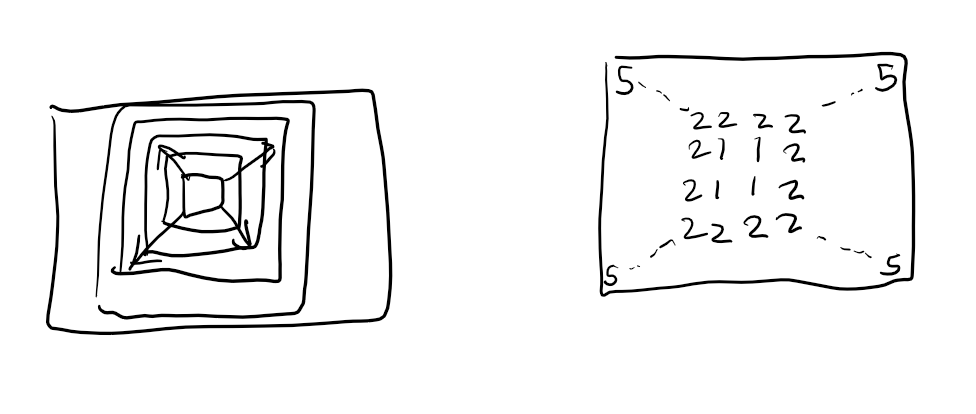

In [ ]:
display.Image("/work/Technique Drawings/Probing All Directions Center.png")

In [ ]:
#Chunks turns the row of 100 to 10 lists of 10 elments
size = 10
row = [1]*100
chunks = [row[x:x+size] for x in range(0, 100, size)]
#print(chunks)
#Creates empty list for each scanning technique to append the chunks
chunks_up_down, chunks_left_right, chunks_SUL, chunks_PUL, chunks_PLR,\
chunks_RL, chunks_DU, chunks_CEN, chunks_SLR, chunks_SUR, chunks_SLL,\
chunks_PUR, chunks_PLL, chunks_CEN_INV, chunks_ASUD, chunks_ASLR,\
chunks_ASDU, chunks_ASRL = ([] for i in range(18))

#loop through chunk of 1s and 0s I think could be turned into list comprehension
s_count = 1
for c_index, c_list in enumerate(chunks):
    #Creates empty list for each row
    u_list_up_down, u_list_left_right, u_list_SUL, u_list_PUL, u_list_PLR,\
    u_list_RL, u_list_DU, u_list_CEN, u_list_SLR, u_list_SLL, u_list_SUR,\
    u_list_PUR, u_list_PLL, u_list_CEN_INV, u_list_ASUD, u_list_ASLR,\
    u_list_ASDU, u_list_ASRL = ([] for i in range(18))
    
    #List comprehension for creating the scanned numbers in each row
    #Scanning left to right 1s become the number column they are in
    u_list_left_right = [item*(idx+1) for idx, item in enumerate(c_list)]
    #Scanning Right to Left
    u_list_RL = [size-item*(idx+1)+1 for idx, item in enumerate(c_list)]
    #Scanning Up to down so 1s become the number row they are in
    u_list_up_down = [item*(c_index+1) for idx, item in enumerate(c_list)]
    #Scanning Down to Up so 1s become the number row they are in
    u_list_DU = [item*(size-1-c_index+1) for idx, item in enumerate(c_list)]
    #Diagonal scanning-from-upper-left 1s become column number + row number
    u_list_SUL = [item*(idx+1)+item*(c_index+1)\
        for idx, item in enumerate(c_list)]
    #Diagonal scanning-from-lower-right 1s become column number + row number
    u_list_SLR = [item*(size-1-idx+1)+item*(size-1-c_index+1)\
        for idx, item in enumerate(c_list)]
    #Diagonal scanning-from-upper-right 1s become column number + row number
    u_list_SUR = [item*(size-1-idx+1)+item*(c_index+1)\
        for idx, item in enumerate(c_list)]
    #Diagonal scanning-from-lower-left 1s become column number + row number
    u_list_SLL = [item*(idx+1)+item*(size-1-c_index+1)\
        for idx, item in enumerate(c_list)]
    #Probing-from-upper-left 1s become max number between column and row
    u_list_PUL = [max(item*(idx+1),item*(c_index+1))\
        for idx, item in enumerate(c_list)]
    #Probing-from-upper-Right 1s become max number between column and row
    u_list_PUR = [max(size+1-item*(idx+1),item*(c_index+1))\
        for idx, item in enumerate(c_list)]
    #Probing-from-lower-left 1s become max number between column and row
    u_list_PLL = [max(item*(idx+1),size+1-item*(c_index+1))\
        for idx, item in enumerate(c_list)]
    #Probing-from-lower-right 1s become max number between column and row from the bottom right corner
    u_list_PLR = [max(size+1-item*(idx+1),size+1-item*(c_index+1))\
    for idx, item in enumerate(c_list)]
    u_list_CEN = [max(max(size-1-idx-(size/2)+1,size-1-c_index-(size/2)+1)\
                                            ,max(idx-(size/2)+1,c_index-(size/2)+1))\
                                            for idx, item in enumerate(c_list)]
    u_list_CEN_INV = [6-max(max(size-1-idx-(size/2)+1,size-1-c_index-(size/2)+1)\
                                            ,max(idx-(size/2)+1,c_index-(size/2)+1))\
                                            for idx, item in enumerate(c_list)]
    u_list_ASUD = [max((abs(idx-4)+1+c_index-1),(idx-4+c_index-1))+1\
    for idx, item in enumerate(c_list)]

    u_list_ASLR = [max((abs(c_index-4)+1+idx-1),(c_index-4+idx-1))+1\
    for idx, item in enumerate(c_list)]

    u_list_ASDU = [max((abs(idx-4)+1+c_index-1),(idx-4+c_index-1))+1\
    for idx, item in enumerate(c_list)]

    u_list_ASRL = [max((abs(c_index-4)+1+idx-1),(c_index-4+idx-1))+1\
    for idx, item in enumerate(c_list)]

    #Append each row to its chunk for techniques
    chunks_left_right.append(u_list_left_right)
    chunks_up_down.append(u_list_up_down)
    chunks_SUL.append(u_list_SUL)
    chunks_PUL.append(u_list_PUL)
    chunks_PLR.append(u_list_PLR)
    chunks_RL.append(u_list_RL)
    chunks_DU.append(u_list_DU)
    chunks_CEN.append(u_list_CEN)
    chunks_CEN_INV.append(u_list_CEN_INV)
    chunks_SLR.append(u_list_SLR)
    chunks_SUR.append(u_list_SUR)
    chunks_SLL.append(u_list_SLL)
    chunks_PUR.append(u_list_PUR)
    chunks_PLL.append(u_list_PLL)
    chunks_ASUD.append(u_list_ASUD)
    chunks_ASLR.append(u_list_ASLR)
    chunks_ASDU.append(u_list_ASDU)
    chunks_ASRL.append(u_list_ASRL)
    #print(chunks_2)
set_list = list(range(1, size+1))
#print(set_list)
#Turn technique chunks into Dataframes
df_l_R = pd.DataFrame(chunks_left_right, columns=set_list,
                index=set_list)
df_u_d = pd.DataFrame(chunks_up_down, columns=set_list,
                index=set_list)

df_SUL = pd.DataFrame(chunks_SUL, columns=set_list,
                index=set_list)
df_PUL = pd.DataFrame(chunks_PUL, columns=set_list,
                index=set_list)
df_PLR = pd.DataFrame(chunks_PLR, columns=set_list,
                index=set_list)
df_RL = pd.DataFrame(chunks_RL, columns=set_list,
                index=set_list)
df_DU = pd.DataFrame(chunks_DU, columns=set_list,
                index=set_list)
df_CEN = pd.DataFrame(chunks_CEN, columns=set_list,
                index=set_list)
df_CEN_INV = pd.DataFrame(chunks_CEN_INV, columns=set_list,
                index=set_list)
df_SLR = pd.DataFrame(chunks_SLR, columns=set_list,
                index=set_list)
df_NTQ = pd.DataFrame(chunks, columns=set_list,
                index=set_list)
df_SUR = pd.DataFrame(chunks_SUR, columns=set_list,
                index=set_list)
df_SLL = pd.DataFrame(chunks_SLL, columns=set_list,
                index=set_list)
df_PUR = pd.DataFrame(chunks_PUR, columns=set_list,
                index=set_list)
df_PLL = pd.DataFrame(chunks_PLL, columns=set_list,
                index=set_list)
df_ASUD = pd.DataFrame(chunks_ASUD, columns=set_list,
                index=set_list)
df_ASLR = pd.DataFrame(chunks_ASLR, columns=set_list,
                index=set_list)
df_ASDU = pd.DataFrame(chunks_ASDU, columns=set_list,
                index=set_list)[::-1].reset_index(drop=True) 
df_ASDU.index += 1 
df_ASRL = pd.DataFrame(chunks_ASRL, columns=set_list,
                index=set_list)
df_ASRL = df_ASRL[df_ASRL.columns[::-1]]
df_ASRL = df_ASRL.set_axis(set_list, axis=1)

print('Scanning Left to Right:\n', df_l_R, '\n')
print('Scanning Right to Left:\n',df_RL, '\n')
print('Scanning from Up to Down:\n', df_u_d, '\n')
print('Scanning from Down to Up:\n', df_DU, '\n')
print('Scanning from Upper Left:\n', df_SUL, '\n')
print('Scanning from Lower Right:\n', df_SLR, '\n')
print('Scanning from Lower Left:\n', df_SLL, '\n')
print('Scanning from Upper Right:\n', df_SUR, '\n')
print('Pulsing from Upper Left:\n', df_PUL, '\n')
print('Pulsing from Lower Right:\n', df_PLR, '\n')
print('Pulsing from Upper Right:\n', df_PUR, '\n')
print('Pulsing from Lower Left:\n', df_PLL, '\n')
print('Pulsing from center to outside:\n', df_CEN, '\n')
print('Pulsing from outside to center:\n', df_CEN_INV, '\n')
print('Arrow scanning up to down :\n', df_ASUD, '\n')
print('Arrow scanning down to up:\n', df_ASDU, '\n')
print('Arrow scanning Left to Right:\n', df_ASLR, '\n')
print('Arrow scanning Right to Left:\n', df_ASRL, '\n')

Scanning Left to Right:
     1   2   3   4   5   6   7   8   9   10
1    1   2   3   4   5   6   7   8   9  10
2    1   2   3   4   5   6   7   8   9  10
3    1   2   3   4   5   6   7   8   9  10
4    1   2   3   4   5   6   7   8   9  10
5    1   2   3   4   5   6   7   8   9  10
6    1   2   3   4   5   6   7   8   9  10
7    1   2   3   4   5   6   7   8   9  10
8    1   2   3   4   5   6   7   8   9  10
9    1   2   3   4   5   6   7   8   9  10
10   1   2   3   4   5   6   7   8   9  10 

Scanning Right to Left:
     1   2   3   4   5   6   7   8   9   10
1   10   9   8   7   6   5   4   3   2   1
2   10   9   8   7   6   5   4   3   2   1
3   10   9   8   7   6   5   4   3   2   1
4   10   9   8   7   6   5   4   3   2   1
5   10   9   8   7   6   5   4   3   2   1
6   10   9   8   7   6   5   4   3   2   1
7   10   9   8   7   6   5   4   3   2   1
8   10   9   8   7   6   5   4   3   2   1
9   10   9   8   7   6   5   4   3   2   1
10  10   9   8   7   6   5   4   3   2   1 



In [ ]:
def top_techniques(rows, size=10):
    df_list_up_down, df_list_left_right, df_list_SUL, df_list_PUL, df_list_PLR,\
    df_list_RL, df_list_DU, df_list_CEN, df_list_SLR, df_list_NTQ, df_list_SLL,\
    df_list_SUR, df_list_PUR, df_list_PLL, df_list_CEN_INV, df_list_ASUD,\
    df_list_ASLR, df_list_ASDU, df_list_ASRL  = ([] for i in range(19))
    max_num = size*size

#iiterate through each row that represents part of the Latin Alphabet
    for index, row in rows:
        #Chunks turns the row of 100 to 10 lists of 10 elments
        chunks = [list(row)[x:x+size] for x in range(0, len(list(row)), size)]
        #print(chunks)
        #Creates empty list for each scanning technique to append the chunks
        chunks_up_down, chunks_left_right, chunks_SUL, chunks_PUL, chunks_PLR,\
        chunks_RL, chunks_DU, chunks_CEN, chunks_SLR, chunks_SUR, chunks_SLL,\
        chunks_PUR, chunks_PLL, chunks_CEN_INV, chunks_ASUD, chunks_ASLR,\
        chunks_ASDU, chunks_ASRL = ([] for i in range(18))

        #loop through chunk of 1s and 0s I think could be turned into list comprehension
        s_count = 1
        for c_index, c_list in enumerate(chunks):
            #Creates empty list for each row
            u_list_up_down, u_list_left_right, u_list_SUL, u_list_PUL, u_list_PLR,\
            u_list_RL, u_list_DU, u_list_CEN, u_list_SLR, u_list_SLL, u_list_SUR,\
            u_list_PUR, u_list_PLL, u_list_CEN_INV, u_list_ASUD, u_list_ASLR,\
            u_list_ASDU, u_list_ASRL = ([] for i in range(18))
            
            #List comprehension for creating the scanned numbers in each row
            #Scanning left to right 1s become the number column they are in
            u_list_left_right = [max_num if item==0 else item*(idx+1) for idx, item in enumerate(c_list)]
            #Scanning Right to Left
            u_list_RL = [max_num if item==0 else size-item*(idx+1)+1 for idx, item in enumerate(c_list)]
            #Scanning Up to down so 1s become the number row they are in
            u_list_up_down = [max_num if item==0 else item*(c_index+1) for idx, item in enumerate(c_list)]
            #Scanning Down to Up so 1s become the number row they are in
            u_list_DU = [max_num if item==0 else item*(size-1-c_index+1) for idx, item in enumerate(c_list)]
            #Diagonal scanning-from-upper-left 1s become column number + row number
            u_list_SUL = [max_num if item==0 else item*(idx+1)+item*(c_index+1)\
             for idx, item in enumerate(c_list)]
            #Diagonal scanning-from-lower-right 1s become column number + row number
            u_list_SLR = [max_num if item==0 else item*(size-1-idx+1)+item*(size-1-c_index+1)\
             for idx, item in enumerate(c_list)]
            #Diagonal scanning-from-upper-right 1s become column number + row number
            u_list_SUR = [max_num if item==0 else item*(size-1-idx+1)+item*(c_index+1)\
             for idx, item in enumerate(c_list)]
            #Diagonal scanning-from-lower-left 1s become column number + row number
            u_list_SLL = [max_num if item==0 else item*(idx+1)+item*(size-1-c_index+1)\
             for idx, item in enumerate(c_list)]
            #Probing-from-upper-left 1s become max number between column and row
            u_list_PUL = [max_num if item==0 else max(item*(idx+1),item*(c_index+1))\
             for idx, item in enumerate(c_list)]
            #Probing-from-upper-Right 1s become max number between column and row
            u_list_PUR = [max_num if item==0 else max(size+1-item*(idx+1),item*(c_index+1))\
             for idx, item in enumerate(c_list)]
            #Probing-from-lower-left 1s become max number between column and row
            u_list_PLL = [max_num if item==0 else max(item*(idx+1),size+1-item*(c_index+1))\
             for idx, item in enumerate(c_list)]
            #Probing-from-lower-right 1s become max number between column and row from the bottom right corner
            u_list_PLR = [max_num if item==0 else max(size+1-item*(idx+1),size+1-item*(c_index+1))\
            for idx, item in enumerate(c_list)]
            u_list_CEN = [max_num if item==0 else max(max(size-1-idx-(size/2)+1,size-1-c_index-(size/2)+1)\
                                                    ,max(idx-(size/2)+1,c_index-(size/2)+1))\
                                                    for idx, item in enumerate(c_list)]
            u_list_CEN_INV = [max_num if item==0 else 6-max(max(size-1-idx-(size/2)+1,size-1-c_index-(size/2)+1)\
                                                    ,max(idx-(size/2)+1,c_index-(size/2)+1))\
                                                    for idx, item in enumerate(c_list)]
            u_list_ASUD = [max_num if item==0 else max((abs(idx-4)+1+c_index-1),(idx-4+c_index-1))+1\
            for idx, item in enumerate(c_list)]

            u_list_ASLR = [max_num if item==0 else max((abs(c_index-4)+1+idx-1),(c_index-4+idx-1))+1\
            for idx, item in enumerate(c_list)]

            u_list_ASDU = [max_num if item==0 else max((abs(idx-4)+1+c_index-1),(idx-4+c_index-1))+1\
            for idx, item in enumerate(c_list)]

            u_list_ASRL = [max_num if item==0 else max((abs(c_index-4)+1+idx-1),(c_index-4+idx-1))+1\
            for idx, item in enumerate(c_list)]

            #Append each row to its chunk for techniques
            chunks_left_right.append(u_list_left_right)
            chunks_up_down.append(u_list_up_down)
            chunks_SUL.append(u_list_SUL)
            chunks_PUL.append(u_list_PUL)
            chunks_PLR.append(u_list_PLR)
            chunks_RL.append(u_list_RL)
            chunks_DU.append(u_list_DU)
            chunks_CEN.append(u_list_CEN)
            chunks_CEN_INV.append(u_list_CEN_INV)
            chunks_SLR.append(u_list_SLR)
            chunks_SUR.append(u_list_SUR)
            chunks_SLL.append(u_list_SLL)
            chunks_PUR.append(u_list_PUR)
            chunks_PLL.append(u_list_PLL)
            chunks_ASUD.append(u_list_ASUD)
            chunks_ASLR.append(u_list_ASLR)
            chunks_ASDU.append(u_list_ASDU)
            chunks_ASRL.append(u_list_ASRL)
            #print(chunks_2)
        set_list = list(range(1, size+1))
        #print(set_list)
        #Turn technique chunks into Dataframes
        df_l_R = pd.DataFrame(chunks_left_right, columns=set_list,
                        index=set_list)
        df_u_d = pd.DataFrame(chunks_up_down, columns=set_list,
                        index=set_list)

        df_SUL = pd.DataFrame(chunks_SUL, columns=set_list,
                        index=set_list)
        df_PUL = pd.DataFrame(chunks_PUL, columns=set_list,
                        index=set_list)
        df_PLR = pd.DataFrame(chunks_PLR, columns=set_list,
                        index=set_list)
        df_RL = pd.DataFrame(chunks_RL, columns=set_list,
                        index=set_list)
        df_DU = pd.DataFrame(chunks_DU, columns=set_list,
                        index=set_list)
        df_CEN = pd.DataFrame(chunks_CEN, columns=set_list,
                        index=set_list)
        df_CEN_INV = pd.DataFrame(chunks_CEN_INV, columns=set_list,
                        index=set_list)
        df_SLR = pd.DataFrame(chunks_SLR, columns=set_list,
                        index=set_list)
        df_NTQ = pd.DataFrame(chunks, columns=set_list,
                        index=set_list)
        df_SUR = pd.DataFrame(chunks_SUR, columns=set_list,
                        index=set_list)
        df_SLL = pd.DataFrame(chunks_SLL, columns=set_list,
                        index=set_list)
        df_PUR = pd.DataFrame(chunks_PUR, columns=set_list,
                        index=set_list)
        df_PLL = pd.DataFrame(chunks_PLL, columns=set_list,
                        index=set_list)
        df_ASUD = pd.DataFrame(chunks_ASUD, columns=set_list,
                        index=set_list)
        df_ASLR = pd.DataFrame(chunks_ASLR, columns=set_list,
                        index=set_list)
        df_ASDU = pd.DataFrame(chunks_ASDU, columns=set_list,
                        index=set_list)[::-1].reset_index(drop=True) 
        df_ASDU.index += 1 
        df_ASRL = pd.DataFrame(chunks_ASRL, columns=set_list,
                        index=set_list)
        df_ASRL = df_ASRL[df_ASRL.columns[::-1]]
        df_ASRL = df_ASRL.set_axis(set_list, axis=1)
        
        #print(df_ntq)


        #Append dataframes to lists for each letter
        df_list_up_down.append(df_u_d)
        df_list_left_right.append(df_l_R)
        df_list_SUL.append(df_SUL)
        df_list_PUL.append(df_PUL)
        df_list_PLR.append(df_PLR)
        df_list_RL.append(df_RL)
        df_list_DU.append(df_DU)
        df_list_CEN.append(df_CEN)
        df_list_CEN_INV.append(df_CEN_INV)
        df_list_SLR.append(df_SLR)
        df_list_NTQ.append(df_NTQ)
        df_list_SUR.append(df_SUR)
        df_list_SLL.append(df_SLL)
        df_list_PUR.append(df_PUR)
        df_list_PLL.append(df_PLL)
        df_list_ASUD.append(df_ASUD)
        df_list_ASLR.append(df_ASLR)
        df_list_ASDU.append(df_ASDU)
        df_list_ASRL.append(df_ASRL)


    technique_dict = {'UD': df_list_up_down,'DU': df_list_DU, 'LR': df_list_left_right\
                        ,'RL': df_list_RL, 'SUL': df_list_SUL, 'SLR': df_list_SLR\
                        ,'SUR': df_list_SUR, 'SLL': df_list_SLL, 'PUL': df_list_PUL\
                        , 'PLR': df_list_PLR, 'PUR': df_list_PUR, 'PLL': df_list_PLL\
                        , 'CEN': df_list_CEN, 'CEN_INV': df_list_CEN_INV, 'NTQ': df_list_NTQ\
                        ,'ASUD': df_list_ASUD, 'ASLR': df_list_ASLR, 'ASDU': df_list_ASDU\
                        ,'ASRL': df_list_ASRL}
    return technique_dict

Create quote and quote train dictionary of datasets with scanning techniques

In [ ]:
train = top_techniques(df.iterrows())
train_inv = top_techniques(df_inv.iterrows())

In [ ]:
print(train['PLR'][25])
#print(train['DU'][0])
print(train['NTQ'][25])

     1    2    3    4    5    6    7    8    9    10
1   100  100  100  100  100  100  100  100  100  100
2   100    9    9    9    9    9    9    9  100  100
3   100  100  100  100  100  100    8    8  100  100
4   100  100  100  100  100    7    7  100  100  100
5   100  100  100  100    6    6  100  100  100  100
6   100  100  100  100    6  100  100  100  100  100
7   100  100  100    7    6  100  100  100  100  100
8   100  100    8    7  100  100  100  100  100  100
9   100  100    8    7    6    5    4    3  100  100
10  100  100  100  100  100  100  100  100  100  100
    1   2   3   4   5   6   7   8   9   10
1    0   0   0   0   0   0   0   0   0   0
2    0   1   1   1   1   1   1   1   0   0
3    0   0   0   0   0   0   1   1   0   0
4    0   0   0   0   0   1   1   0   0   0
5    0   0   0   0   1   1   0   0   0   0
6    0   0   0   0   1   0   0   0   0   0
7    0   0   0   1   1   0   0   0   0   0
8    0   0   1   1   0   0   0   0   0   0
9    0   0   1   1   1   1   1

# Persistent Homology Bar Codes

Function takes in a dictionary of dataframes with scanning techniques and calculates the bar codes. This is done by using Ripser's lower_star_img function. This filtration allows us to express local minimums (or maximums if flipped) as birth times and saddle points as death times in a 0-dimensional persistence diagram. This is a useful and probably stable way of summarizing critical points in an image. 

Here we are converting the dictionary of  matrics which were discovered by different techniques like UD, LR, SUL, PUL, PLR, RL, DU, CEN, SLR to a numpy array with respect to their index values and appended to the dgm_dict dictionary. then we run then with some conditions which can be seen in the lines 22, 31 and 35

- Line-29 If  letter is not equal to ' ' , then its an array which was created by one of the above scanning techniques.

- line-31 Here we are checking whether the letter matches with an array of any scanning technique with respect to its index values

In [ ]:
def bar_graphs(techniques_dict, one_element=False, letter = ''):
    dgm_list = []
    dgm_dict = {}
    for index, data_frame in enumerate(techniques_dict['UD']):
        #print(index)
        dgm_up_down = lower_star_img(data_frame.to_numpy())
        #print(dgm_up_down)

        dgm_left_right = lower_star_img(techniques_dict['LR'][index].to_numpy())
        #print(dgm_left_right)

        dgm_SUL = lower_star_img(techniques_dict['SUL'][index].to_numpy())
        #print(dgm_SUL)

        dgm_PUL = lower_star_img(techniques_dict['PUL'][index].to_numpy())
        #print(dgm_PUL)

        dgm_PLR = lower_star_img(techniques_dict['PLR'][index].to_numpy())
        #print(dgm_PLR)

        dgm_RL = lower_star_img(techniques_dict['RL'][index].to_numpy())
        #print(dgm_RL)
        dgm_DU = lower_star_img(techniques_dict['DU'][index].to_numpy())
        #print(dgm_DU)
        dgm_CEN = lower_star_img(techniques_dict['CEN'][index].to_numpy())
        dgm_CEN_INV = lower_star_img(techniques_dict['CEN_INV'][index].to_numpy())
        #print(dgm_CEN)
        dgm_SLR = lower_star_img(techniques_dict['SLR'][index].to_numpy())
        #print(dgm_SLL)
        dgm_SLL = lower_star_img(techniques_dict['SLL'][index].to_numpy())
        dgm_SUR = lower_star_img(techniques_dict['SUR'][index].to_numpy())
        dgm_PLL = lower_star_img(techniques_dict['PLL'][index].to_numpy())
        dgm_PUR = lower_star_img(techniques_dict['PUR'][index].to_numpy())

        dgm_ASUD = lower_star_img(techniques_dict['ASUD'][index].to_numpy())
        dgm_ASDU = lower_star_img(techniques_dict['ASDU'][index].to_numpy())
        dgm_ASLR = lower_star_img(techniques_dict['ASLR'][index].to_numpy())
        dgm_ASRL = lower_star_img(techniques_dict['ASRL'][index].to_numpy())

        if letter != '':
            dgm_dict[alphabet_full[index]] = [dgm_up_down, dgm_left_right, dgm_SUL, dgm_PUL, dgm_PLR, dgm_RL,\
                                        dgm_DU, dgm_CEN, dgm_SLR, dgm_SLL, dgm_SUR, dgm_PLL, dgm_PUR,\
                                         dgm_CEN_INV, dgm_ASUD, dgm_ASDU, dgm_ASLR, dgm_ASRL]
        elif isinstance(letter, list):
            dgm_dict[letter[index]] = [dgm_up_down, dgm_left_right, dgm_SUL, dgm_PUL, dgm_PLR, dgm_RL,\
                                        dgm_DU, dgm_CEN, dgm_SLR, dgm_SLL, dgm_SUR, dgm_PLL, dgm_PUR,\
                                        dgm_CEN_INV, dgm_ASUD, dgm_ASDU, dgm_ASLR, dgm_ASRL]
        else:
            #print(index)
            dgm_dict[alphabet_full[index]] = [dgm_up_down, dgm_left_right, dgm_SUL, dgm_PUL, dgm_PLR, dgm_RL,\
                                        dgm_DU, dgm_CEN, dgm_SLR, dgm_SLL, dgm_SUR, dgm_PLL, dgm_PUR,\
                                        dgm_CEN_INV, dgm_ASUD, dgm_ASDU, dgm_ASLR, dgm_ASRL]
    if one_element:
        return [dgm_up_down, dgm_left_right, dgm_SUL, dgm_PUL, dgm_PLR, dgm_RL,\
                        dgm_DU, dgm_CEN, dgm_SLR, dgm_SLL, dgm_SUR, dgm_PLL, dgm_PUR,\
                        dgm_CEN_INV, dgm_ASUD, dgm_ASDU, dgm_ASLR, dgm_ASRL]
    else:
        return dgm_dict

# Co-Homology of a line/slice function

The following lines of code takes in the dictionary of letters with the homology techniques. The function uses only the dataframe with no techniques implemented. Then, it breaks each letter down by a slice horizontally, vertically, diagonally left to right, and diagonally right to left and calculates the Co-homology of the slice by edges/vertices. Returns a dictionary of letters containing a list of the sliced Co-Homologies. For our Vertical Sliced Co-Homology, we go through each column and count the number of vertices (points in the column). We also count the number of edges (connected vertices with no breaks) to calculate the co-homology we do edges divided by vertices. An example of this is a column [0, 0, 1, 1, 0, 1, 1, 1, 0, 0]. This column has five vertices and two edges; its Co-Homology is 0.4 or 2/5. For our Horizontal Sliced Co-Homology, we go through each row and count the number of vertices and edges to calculate the Co-Homology. An example of this is a row [0, 1, 1, 0, 1, 0, 0, 1, 0, 0]. This column has four vertices and three edges; its Co-Homology is 0.75 or 3/4. The approach is a little different for the two diagonal Sliced Co-Homologies, left to right and right to left. Going diagonally, there are more slices than vertically or horizontally with varying degrees of length. The number of slices going diagonally will be the image size multiplied by two minus one, and the image must be a square for the diagonal method to work. In our case, the image size we are working with is 10x10, so the number of slices are nineteen. The size of each slice can be shown in this array/list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]. Then the Co-Homologies are calculated the same as the previously mentioned vertical and horizontal methods, with mostly smaller slices, albeit with more slices to go through. 

In [ ]:
'''
Need to count the edges and the points
points are any 1s and edge is any connection to 1s together
'''
def zero_line_homology(technique_dict):
    line_homology = {}
    for index, df_letter in enumerate(technique_dict['NTQ']):
        
        row_list = []
        col_list = []
        diag_lr_list = []
        diag_rl_list = []
        #print(df_letter)
        for idx, row in df_letter.iterrows():
            vertices = list(row).count(1)
            last_element = 0
            edges = 0
            for i in list(row):
                if i == 1 and last_element == 0:
                    edges += 1
                last_element = i
            if vertices == 0:
                zero_row_homology = 0
            else:
                zero_row_homology = round(edges/vertices,4)
            row_list.append(zero_row_homology)
        for idx, col in df_letter.iteritems():
            vertices = list(col).count(1)
            last_element = 0
            edges = 0
            for i in list(col):
                if i == 1 and last_element == 0:
                    edges += 1
                last_element = i
            if vertices == 0:
                zero_row_homology = 0
            else:
                zero_row_homology = round(edges/vertices,4)
            col_list.append(zero_row_homology)
        
        #diagonal line cohomologies
        np_row_lists = df_letter.to_numpy()
        #print(df_letter)
        distance = []
        lines = len(df_letter)*2
        for i in range(1,lines):
            distance.append(min(i, lines-i))
        #Right to left diagonal
        diagonal_list = []
        for idx, i in enumerate(distance):
            #print('Distance: ', i)
            temp_list = []
            #print('Line: ', idx)
            for line_index, elem in enumerate(range(1, i+1)):
                #print(elem, i)
                if idx > 9:
                    #(2,10) or (10,2)
                    #print(10-i,10-elem)
                    temp_list.append(np_row_lists[10-i][10-elem])
                else:
                    #print(elem-1, i-1)
                    temp_list.append(np_row_lists[elem-1][i-1])
                i = i-1
            diagonal_list.append(temp_list)
        for diag_list in diagonal_list:
            vertices = diag_list.count(1)
            last_element = 0
            edges = 0
            for i in diag_list:
                if i == 1 and last_element == 0:
                    edges += 1
                last_element = i
            if vertices == 0:
                zero_diag_homology = 0
            else:
                zero_diag_homology = round(edges/vertices,4)
            diag_lr_list.append(zero_diag_homology)
       #Right to left diagonal
        diagonal_list = []
        for idx, i in enumerate(distance):
            #print('Distance: ', i)
            temp_list = []
            #print('Line: ', idx)
            for line_index, elem in enumerate(range(1, i+1)):
                #print(elem, i)
                if idx > 9:
                    #print(10-i,elem-1)
                    temp_list.append(np_row_lists[10-i][elem-1])
                else:
                    #print(elem-1, 10-i)
                    temp_list.append(np_row_lists[elem-1][10-i])
                i = i-1
            diagonal_list.append(temp_list)
        #print(diagonal_list)
        for diag_list in diagonal_list:
            vertices = diag_list.count(1)
            last_element = 0
            edges = 0
            for i in diag_list:
                if i == 1 and last_element == 0:
                    edges += 1
                last_element = i
            if vertices == 0:
                zero_diag_homology = 0
            else:
                zero_diag_homology = round(edges/vertices,4)
            diag_rl_list.append(zero_diag_homology) 
        
        line_homology[alphabet_full[index]] = row_list + col_list + diag_lr_list + diag_rl_list
    return line_homology


In [ ]:
line_homology_dict = zero_line_homology(train)
#train

Create trained bar codes

In [ ]:
train_dgm = bar_graphs(train)
train_dgm_inv = bar_graphs(train_inv)

In [ ]:
def distance_dgm(dgm):
    new_dgm = []
    dgm_list_copy = copy.deepcopy(dgm)
    for matrix in dgm_list_copy:
        #print(matrix)
        temp = []
        for i in matrix:
            i[np.isinf(i)] = 100
            temp.append(i)
        new_dgm.append(temp)
    return new_dgm

# Vector Function

Function creates measurable vectors for each letter using the number of bars from each technique, minimum number in each bar code from each technique, maximum number in each bar code from each technique excluding infinity, the sum of each bar code for each technique, sum of all bar codes for each letter, sum of the the spacial distance between each bar codes for each letter. Added with the slice Co-homologies of each letter.

- Betti Number: the number of bars computed from the persistent 0-homology, can be different depending the scanning technique used for the same letter. Examples: [[ 2. inf]] is 1, [[ 2.  5.] [ 2. inf]] is 2, and  [[ 2.  7.] [ 2.  7.] [ 2. inf]] is 3.

- Bar code min: The minimum number in the computed bar code. Example: [[10. 12.] [12. 13.]  [ 6. inf]] is 6.

- Bar code max: The maximum number in the computed bar code excluding infinity. Example: [[ 5.  7.] [ 2. inf]] is 7.

- Bar code sum: The sum of each bar code excluding infinity. Example: [[  5. 100.] [  4.  inf]] is 109

- Sum of all bar code's sums: The sum of all sum of bar codes excluding infinity. The Final number is divided by 10

- Sum of spatial distances: Each bar code is represented as a matrix. Using Scipy's distance_matrix function we calculate the Euclidean distance between each bar code in matrix form. The function returns a matrix of the number columns of matrix 1 x number columns of matrix 1. This can be represented as matrix x (M, K) and y (N, K) then the distance is represented as M x N. We then take the sums of all these distances and add them together. The final number is divided by 100.

- Sliced Co-homologies: This is explained earlier, this function calls the Sliced Homology function for the letter.

With the use of nine techniques our final vector has 96 total features to compare classifications of each letter. 

In [ ]:
def vector(dgm_list, zero_homo):
    letter_vectors = {}
    for list_num, dgm in enumerate(dgm_list):

        dgm_list_copy = copy.deepcopy(dgm)
        for index, letter in enumerate(dgm_list_copy):
            if list_num == 0:
                letter_vectors[letter] = []
            lengths = []
            new_sum = 0
            distances_full = []
            new_dgm = distance_dgm(dgm_list_copy[letter])
            #print(len(letter))
            for index_2, matrix in enumerate(dgm_list_copy[letter]):
                #Betti numbers
                #print(index_2)
                lengths.append(len(matrix))
                #lengths.append(matrix.min())
                matrix[np.isinf(matrix)] = 0
                lengths.append(matrix.max())
                #sum of each bar code
                #lengths.append(matrix.sum())
                #sum of all bar codes
                new_sum += matrix.sum()
                #Change number based on number of techniques
                #Currently 18 techniques so it is 18 for 0 to 17
                for i in range(0, 17-index_2):

                    #print(index_2, i+1+index_2)
                    spatial_distance = distance_matrix(new_dgm[index_2], new_dgm[i+1+index_2])
                    distances_full.append(spatial_distance.sum())
            dist_sum = 0
            #print(np.array(distances).var())
            for index_3, dist in enumerate(distances_full):
                dist_sum += dist.sum()
            #lengths.append(new_sum/100)
            #lengths.append(dist_sum/1000)
            line_homology = zero_homo[letter]
            #print(lengths, line_homology)
            #print(lengths.extend(line_homology))
            if list_num == 0:
                letter_vectors[letter] += lengths+line_homology
            else:
                #print(letter_vectors)
                letter_vectors[letter] += lengths
    return letter_vectors

In [ ]:
vectors = vector([train_dgm], line_homology_dict)

Grabs test letters to convert to the correct formatting to test classification

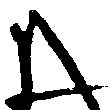

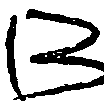

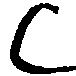

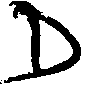

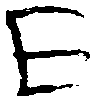

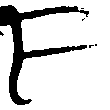

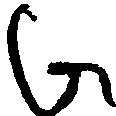

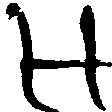

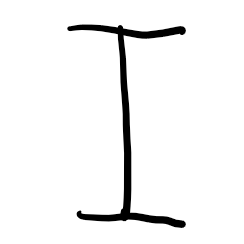

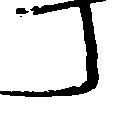

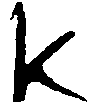

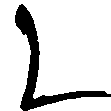

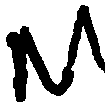

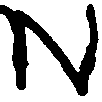

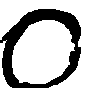

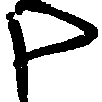

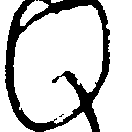

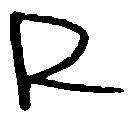

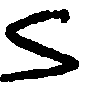

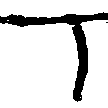

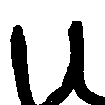

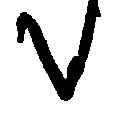

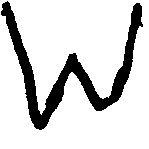

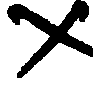

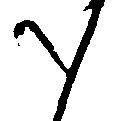

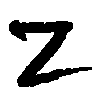

In [ ]:
test_list = []
i = 1
for name in sorted(glob.glob('Test/*.png')):
    #print(i)
    img = Image.open(name)
    image_size = img.size
    #print(img.size)
    square_max = min(image_size)
    left = 0
    top = 0
    right = square_max
    bottom = square_max

    # Cropped image of above dimension
    # (It will not change original image)
    im1 = img.crop((left, top, right, bottom))

    # Shows the image in image viewer
    #print(im1.size)
    im1.show()
    resize_image = im1.resize((10,10))
    numpydata = np.asarray(resize_image)
    #print(len(numpydata))
    '''
    if len(numpydata) > 1:
        numpydata = numpydata[0,0:]
    '''
    numpydata_copy = copy.deepcopy(numpydata)
    numpydata_copy[numpydata_copy < 254] = 1
    numpydata_copy[numpydata_copy > 253] = 0
    #print(numpydata_copy)
    letter_list = numpydata_copy.tolist()
    single_list = list(itertools.chain.from_iterable(letter_list))
    df = pd.DataFrame(single_list).T
    test_list.append(df.head(1))
    #print(df.head(1))
    i += 1
test_dfs = pd.concat(test_list)
#print(test_dfs)

In [ ]:
test_tech_2 = top_techniques(test_dfs.iterrows(), 10)
test_tech_2_inv = top_techniques(test_dfs[test_dfs.columns[::-1]].iterrows(), 10)
test_dgm_2 = bar_graphs(test_tech_2)
test_dgm_2_inv = bar_graphs(test_tech_2_inv)
line_homology_dict_test = zero_line_homology(test_tech_2)
test_vector_2 = vector([test_dgm_2], line_homology_dict_test)
test_vector_2

{'a': [1,
  1.0,
  2,
  2.0,
  2,
  5.0,
  1,
  3.0,
  1,
  1.0,
  1,
  1.0,
  2,
  2.0,
  2,
  3.0,
  1,
  2.0,
  1,
  2.0,
  2,
  10.0,
  1,
  1.0,
  2,
  8.0,
  4,
  2.0,
  1,
  2.0,
  1,
  2.0,
  1,
  2.0,
  1,
  2.0,
  0.5,
  0.3333,
  0.2,
  0.1667,
  0.4,
  0.5,
  0.3333,
  0.25,
  0.1,
  0.25,
  0.5,
  0.125,
  0.1,
  0.25,
  0.3333,
  0.1667,
  0.2,
  0.25,
  0.3333,
  0.3333,
  0,
  0,
  1.0,
  0.25,
  0.3333,
  0.25,
  0.25,
  0.6667,
  0.4,
  0.4,
  0.4,
  0.5,
  0.25,
  0.25,
  0.5,
  0.5,
  0.3333,
  0.5,
  1.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.5,
  0.3333,
  0.125,
  0.125,
  0.3333,
  0.3333,
  0.4,
  0.25,
  0.25,
  0.3333,
  0.5,
  0.5,
  1.0],
 'b': [1,
  1.0,
  1,
  1.0,
  1,
  3.0,
  2,
  6.0,
  1,
  2.0,
  1,
  1.0,
  1,
  1.0,
  1,
  1.0,
  1,
  3.0,
  1,
  3.0,
  1,
  4.0,
  1,
  2.0,
  1,
  2.0,
  3,
  2.0,
  3,
  10.0,
  3,
  10.0,
  1,
  1.0,
  1,
  1.0,
  0.3333,
  0.1111,
  0.25,
  0.4,
  0.25,
  0.1,
  0.1,
  0.3333,
  0.1,
  0.1667,
  0.125,
  0.1111,
  

# Predictions

In [ ]:
min_dist=10000000
v1=0
v2=0
count = 0
for i in test_vector_2:
    print(i)
    min_dist=10000000
    for j in vectors:

        a=np.array(test_vector_2[i])
        b=np.array(vectors[j])
        dist=np.linalg.norm(a-b)
        #print('distance', dist,'between letters',i,j)
        if dist < min_dist:
            min_dist=dist
            v1=i
            v2=j
            #print('found smaller distance:',min_dist,'letters:',v1,v2)
            #print(test_vector_2[i],'\n', vectors[j])
    #print(test_tech_2['NTQ'][count])
    #print(train['NTQ'][count])
    count+=1
    print('min distance:', min_dist, 'letters',v1,v2)

a
min distance: 13.415370269209866 letters a i
b
min distance: 10.012825708060639 letters b b
c
min distance: 8.599032142049476 letters c c
d
min distance: 10.223610938900208 letters d j
e
min distance: 10.534543085487856 letters e e
f
min distance: 8.258775961969185 letters f f
g
min distance: 14.905454873636026 letters g g
h
min distance: 12.158040566226122 letters h v
i
min distance: 9.81979386443524 letters i j
j
min distance: 15.951456802436573 letters j j
k
min distance: 11.235671304821977 letters k b
l
min distance: 15.876339949749125 letters l l
m
min distance: 12.05083839324053 letters m y
n
min distance: 13.324471673578657 letters n m
o
min distance: 8.439028124730951 letters o d
p
min distance: 8.334273670812593 letters p p
q
min distance: 7.310749850733506 letters q q
r
min distance: 7.468019923647767 letters r r
s
min distance: 12.034274213678197 letters s f
t
min distance: 15.845500803382643 letters t t
u
min distance: 7.861097076108398 letters u u
v
min distance: 5.98917

#  Classification smallest distance

In [ ]:
min_dist=10000000
v1=0
v2=0
min_dist_list = []
#print(vectors)
for i in vectors:
    #print(i)
    v1=0
    v2=0
    min_dist=10000000
    for j in vectors:
        if not i==j:
            a=np.array(vectors[i])
            b=np.array(vectors[j])
            dist=np.linalg.norm(a-b)
            #print('distance', dist,'between letters',i,j)
            if dist < min_dist:
                min_dist=dist
                v1=i
                v2=j
                #print('found smaller distance:',min_dist,'letters:',v1,v2)
                #print(vectors[i],'\n', vectors[j])
    min_dist_list.append(min_dist)
    if i == 'z':
        break
print('min distance:', min_dist, 'letters',v1,v2)
print(sum(min_dist_list) / len(min_dist_list))
mid = len(min_dist_list) // 2
res = (min_dist_list[mid] + min_dist_list[~mid]) / 2
print(res)
print(min_dist_list)
print(len(min_dist_list))


min distance: 14.220082837663078 letters z j
9.111333570103724
10.319511626942813
[8.618503480303294, 9.056103279004718, 8.399366577308077, 8.925613736320882, 7.086931351438364, 6.638035885711977, 6.638035885711977, 8.963834078116351, 7.531871540327809, 12.290476930941288, 6.638798251942893, 9.056103279004718, 11.675189175769273, 8.963834078116351, 8.925613736320882, 6.729639820228123, 13.328714721232503, 6.729639820228123, 17.16198285630189, 9.433035382632676, 10.05695475230947, 6.310579478146202, 10.505556483594766, 6.699595925874934, 6.310579478146202, 14.220082837663078]
26


# Advantages

The results of our classification were reasonably good. The smallest distance between letters classification is 22.6 between z and i. While the smallest distance between all characters is 3.6 between ':' and ';'. This means our techniques and using information from the bar codes distinguish between each letter. We looked at how the classification performed across all letters and characters. Overall performance was measured by the mean and median of the distance norm. The average distance between letters is 17.5, and the median distance is 20.5. While the average distance between all characters is 24.2 and the median distance is 20.

Topological methods' advantage in classifying the Latin Alphabet vs. using is the trace-back explainability of Topology. Alternatively, we could use Machine Learning and Deep Learning for the same use cases; however, they come with their own caveats. Using Machine Learning and Deep Learning techniques, you usually do not have a way to explain how the computer came about the prediction. When you do, it is generally from regression methods, and then you only have how much a variable correlates with the predictor. With homology, every part can be traced back to how the decision was made for the predicted value through bar codes. Since we can trace back how a decision was made if needed, we could visually show the steps of the classification and, eventually, why a prediction came about.

Our best prediction test got 10 letters correct: c, j, m, n, p, q, r, s,u, and x.

# Criticism

For this project, we created our classification using neatly hand-drawn letters and hand-counted the pixels on a 10x10 frame. This method causes us to have tiny representations of letters. The letters are a little smooshed. Hand counting the pixels instead of having a computer can cause inaccuracies because we can not go into as much detail as a computer can. A future feature would be to use the cv2 library to read in the letters to create a grayscale representation of the images to then represent pixels as a 0 or 1 in the use case for the project. We partially made this feature in testing; however, the feature was never implemented.

Looking at how we interpret our homologies, some things could lead to wrong predictions. These issues include using the computed bar codes' sums, mins, and maxs. For the sums, letters with thicker lines will more often have larger sums depending on the technique used. This is bad because we do not want a classification variable to be drastically different between the same letter because one handwritten letter has thinner lines than another. Using min and max numbers in bar codes also introduces an issue with the position of letters in different spots, like shifting a letter to the right or up. Having a shift in a letter affect the classification is not ideal. Lastly, looking into the calculation of the sums of spacial distances of the bar codes in matrix form, we found the larger the lines in a letter, the larger the spatial distance sum would be. Similarly to the issue for the sum of the bar codes, we want to minimize the effect of thicker and thinner lines in creating a classification of letters.

# Improvements

More techniques, more techniques, more techniques. In theory, by using a lot of different scanning techniques, we can create a classification of letters using just the Betti numbers to distinguish between each letter, as well as our Sliced Co-Homology. This means our classification does not need to rely on the techniques' sums, spacial distance, and min and max. Sums, spacial distance, and min and max of the techniques are more susceptible to differences in the way the same letter is written. By using just our Betti numbers and our Sliced Co-Homology, I believe we could more accurately predict handwritten letters.

Another change that could be made is to try a different type of Norm to measure classification distances between the vectors for letters. An alternative could be using Frobenius Norm.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3975852-3619-4f95-970c-90c02f1f882d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>